In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optimizer
import torch.utils.data as Data

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.FloatTensor
device

device(type='cuda')

In [3]:
sentences = ["jack like dog", "jack like cat", "jack like animal",
  "dog cat animal", "banana apple cat dog like", "dog fish milk like",
  "dog cat animal like", "jack like apple", "apple like", "jack like banana",
  "apple banana jack movie book music like", "cat dog hate", "cat dog like"]
sentence_list = " ".join(sentences).split() # ['jack', 'like', 'dog']
vocab = list(set(sentence_list))
word2idx = {w:i for i, w in enumerate(vocab)}
vocab_size = len(vocab)

In [5]:
# model parameters
C = 2 # window size
batch_size = 8
m = 2 # word embedding dim

In [7]:
skip_grams = []
for idx in range(C, len(sentence_list) - C):
    center = word2idx[sentence_list[idx]]
    context_idx = list(range(idx - C, idx)) + list(range(idx + 1, idx + C + 1))
    context = [word2idx[sentence_list[i]] for i in context_idx]

    for w in context:
        skip_grams.append([center, w])

In [8]:
def make_data(skip_grams):
    input_data = []
    output_data = []
    for a, b in skip_grams:
        input_data.append(np.eye(vocab_size)[a])
        output_data.append(b)
    return input_data, output_data

In [9]:
input_data, output_data = make_data(skip_grams)
input_data, output_data = torch.Tensor(input_data), torch.LongTensor(output_data)
dataset = Data.TensorDataset(input_data, output_data)
loader = Data.DataLoader(dataset, batch_size, True)

c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  


In [11]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        self.W = nn.Parameter(torch.randn(vocab_size, m).type(dtype))
        self.V = nn.Parameter(torch.randn(m, vocab_size).type(dtype))

    def forward(self, X):
        # X : [batch_size, vocab_size]
        hidden = torch.mm(X, self.W) # [batch_size, m]
        output = torch.mm(hidden, self.V) # [batch_size, vocab_size]
        return output
    
model = Word2Vec().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optim = optimizer.Adam(model.parameters(), lr=1e-3)

In [12]:
for epoch in range(2000):
    for i, (batch_x, batch_y) in enumerate(loader):
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)

        if (epoch + 1) % 1000 == 0:
            print(epoch + 1, i, loss.item())
    
        optim.zero_grad()
        loss.backward()
        optim.step()

1000 0 2.1249451637268066
1000 1 1.7360754013061523
1000 2 2.4674065113067627
1000 3 2.1577532291412354
1000 4 1.9168895483016968
1000 5 1.6507222652435303
1000 6 1.9858450889587402
1000 7 2.1846089363098145
1000 8 2.1250741481781006
1000 9 1.9256950616836548
1000 10 1.4905447959899902
1000 11 2.793865203857422
1000 12 2.2181077003479004
1000 13 1.9992921352386475
1000 14 2.2039830684661865
1000 15 2.253570556640625
1000 16 2.6763195991516113
1000 17 1.8999788761138916
1000 18 2.3167524337768555
1000 19 2.0826992988586426
1000 20 1.9023269414901733
2000 0 2.2089130878448486
2000 1 2.2041687965393066
2000 2 1.8452569246292114
2000 3 2.112050771713257
2000 4 1.853405475616455
2000 5 2.127729892730713
2000 6 1.9805200099945068
2000 7 2.039613962173462
2000 8 2.293088674545288
2000 9 2.1359126567840576
2000 10 2.7353594303131104
2000 11 1.927628755569458
2000 12 1.8733375072479248
2000 13 2.081012725830078
2000 14 2.0865447521209717
2000 15 1.613937258720398
2000 16 2.1657376289367676
2000

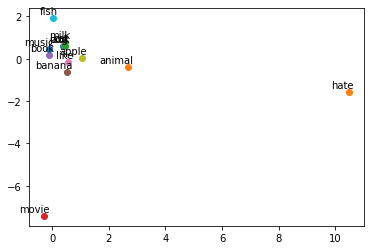

In [15]:
import matplotlib.pyplot as plt
for i, label in enumerate(vocab):
    W, WT = model.parameters()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()